In [1]:
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from collections import defaultdict

In [2]:
# directory of all trained models
model_dir = "./single_symbol/2019_08_28_08_12_01/"

In [3]:
# sub-directory, each contains model with a specific set of hyperparameters
subfolders = [f.path for f in os.scandir(model_dir) if f.is_dir()]

In [4]:
# function to read log output file
def read_params(param_line):
    params = {}
    param_line = param_line.replace('\"', '')
    param_line = param_line.replace('# launching [', '')
    param_line = param_line.replace(']', '')

    for param in param_line.split(', '):
        if '=' not in param:
            continue

        arg, val = param.split('=')
        arg = arg.replace('--', '')
        if arg == 'data_prefix':
            val = os.path.basename(val)
            val = val.replace('10k_qa_f2_c2', '2-feats')
            val = val.replace('10k_qa_f3_c3', '3-feats')
            val = val.replace('10k_qa_f5_c5', '5-feats')
            
            params['n_features'] = val
        else:
            params[arg] = val

    return params

In [5]:
# return the accuracy of train and test
def read_result(result_line):
    items = result_line.strip().split(', ')
    if items[0].startswith('train'):
        mode = 'train'
    else:
        mode = 'test'
    
    question_acc = 0.
    for item in items:
        if 'question_acc' in item:
            question_acc = float(item.split('tensor(')[1])
    return mode, question_acc

In [6]:
# record accuracy across epochs

params = defaultdict(dict)
train_acc = defaultdict(list)
dev_acc = defaultdict(list)
num_epochs = defaultdict(list)

for log_id in subfolders:
    fname = log_id + '_log.out'
    log_id = os.path.basename(log_id)
    tmp_train_acc = []
    tmp_dev_acc = []
    with open(fname) as f:
        for i, line in enumerate(f):
            line = line.strip()
            if i == 0:
                params[log_id] = read_params(line)
                continue
            if i == 1:
                continue
            
            mode, question_acc = read_result(line)
            question_acc = round(float(question_acc) * 100, 1)

            if mode == 'train':
                tmp_train_acc.append(str(question_acc))
            else:
                tmp_dev_acc.append(str(question_acc))
    
        train_acc[log_id] = tmp_train_acc
        dev_acc[log_id] = tmp_dev_acc
        num_epochs[log_id] = len(tmp_train_acc)

In [7]:
# record log_id, hyperparameters, and accuracies (train and dev)
check_params = ['n_features', 'batch_size', 'hidden_dim', 'fa_entropy_coeff', 'read_function', 'lr', 'weight_decay', 'early_stopping']
for log_id in params:
    hp = []
    for key in sorted(params[log_id]):
        if key in check_params:
            hp.append(params[log_id][key])
    print(log_id, ' '.join(str(x) for x in hp), num_epochs[log_id], train_acc[log_id][-1], dev_acc[log_id][-1])

17165641_0 128 0.01 250 0.001 5-feats concat125 500 91.8 59.8
17165639_0 128 0.01 250 0.001 2-feats concat125 500 93.8 93.6
17165635_0 128 0.001 250 0.001 5-feats concat175 500 97.6 77.4
17165629_0 128 0.001 250 0.001 5-feats concat100 500 94.6 74.4
17165640_0 128 0.01 250 0.001 3-feats concat125 500 84.9 84.4
17165638_0 128 0.01 250 0.001 5-feats concat100 500 92.0 72.5
17165631_0 128 0.001 250 0.001 3-feats concat125 500 90.4 90.2
17165630_0 128 0.001 250 0.001 2-feats concat125 500 81.5 81.2
17165636_0 128 0.01 250 0.001 2-feats concat100 500 93.6 93.6
17165653_0 128 0.1 250 0.001 5-feats concat175 500 92.2 76.7
17165655_0 128 1.0 250 0.001 3-feats concat100 500 77.3 77.3
17165637_0 128 0.01 250 0.001 3-feats concat100 500 86.8 86.6
17165642_0 128 0.01 250 0.001 2-feats concat175 500 94.1 93.3
17165652_0 128 0.1 250 0.001 3-feats concat175 500 100.0 100.0
17165646_0 128 0.1 250 0.001 3-feats concat100 500 77.3 77.3
17165627_0 128 0.001 250 0.001 2-feats concat100 500 94.1 93.3
17165

17166497_0 512 0.001 500 0.001 3-feats concat175 500 77.9 77.9
17166392_0 512 0.1 500 0.001 3-feats concat175 500 100.0 100.0
17166427_0 512 0.001 500 0.001 3-feats concat175 500 88.7 88.5
17166406_0 512 1.0 500 0.001 5-feats concat125 500 92.7 66.4
17166433_0 512 0.01 500 0.001 3-feats concat100 500 88.0 87.7
17166378_0 512 0.01 500 0.001 5-feats concat175 500 99.2 79.0
17166376_0 512 0.01 500 0.001 3-feats concat175 500 89.6 89.2
17166400_0 512 1.0 500 0.001 5-feats concat100 500 93.0 74.8
17166404_0 512 1.0 500 0.001 3-feats concat125 500 77.2 77.3
17166345_0 512 0.001 500 0.001 2-feats concat100 500 94.1 93.3
17166389_0 512 0.1 500 0.001 5-feats concat125 500 93.9 67.4
17166429_0 512 0.001 500 0.001 5-feats concat175 500 95.1 78.0
17166383_0 512 0.1 500 0.001 5-feats concat100 500 92.1 71.0
17166416_0 512 0.001 500 0.001 3-feats concat100 500 82.8 82.4
17166495_0 512 0.001 500 0.001 2-feats concat175 500 100.0 100.0
17166385_0 512 0.1 500 0.001 2-feats concat125 500 100.0 100.0
171

17167333_0 512 0.001 250 0.0001 3-feats concat125 500 83.3 83.4
17167308_0 512 0.01 250 0.0001 2-feats concat175 500 100.0 100.0
17167302_0 512 0.01 250 0.0001 2-feats concat100 500 100.0 100.0
17167328_0 512 1.0 250 0.0001 5-feats concat175 500 92.8 74.3
17167297_0 512 0.001 250 0.0001 3-feats concat125 500 83.1 83.2
17167317_0 512 0.1 250 0.0001 2-feats concat175 500 99.9 100.0
17167326_0 512 1.0 250 0.0001 2-feats concat175 500 75.4 75.4
17167319_0 512 0.1 250 0.0001 5-feats concat175 500 93.2 74.5
17167320_0 512 1.0 250 0.0001 2-feats concat100 500 75.4 75.4
17167318_0 512 0.1 250 0.0001 3-feats concat175 500 77.2 78.4
17167294_0 512 0.001 250 0.0001 3-feats concat100 500 83.1 83.3
17167337_0 512 0.001 250 0.0001 3-feats concat175 500 82.9 82.1
17167323_0 512 1.0 250 0.0001 2-feats concat125 500 75.4 75.4
17167324_0 512 1.0 250 0.0001 3-feats concat125 500 77.2 77.3
17167336_0 512 0.001 250 0.0001 2-feats concat175 500 100.0 100.0
17167321_0 512 1.0 250 0.0001 3-feats concat100 500

In [23]:
hyperparams = ['read_function', 'n_features', 'batch_size', 'fa_entropy_coeff', 'hidden_dim']
random_seeds = [5248, 3412, 6323, 9347, 7234]
train_stats = defaultdict(lambda: defaultdict(float))
dev_stats = defaultdict(lambda: defaultdict(float))
all_train_acc = defaultdict(float)
for log_id in sorted(train_acc):
    assert len(train_acc) == len(dev_acc)
    final_train_acc = train_acc[log_id][-1]
    final_dev_acc = dev_acc[log_id][-1]
    
    seed = params[log_id]['random_seed']
    stat = []
    for hp in hyperparams:
        stat.append(params[log_id][hp])
    train_stats[tuple(stat)][seed] = str(final_train_acc)
    dev_stats[tuple(stat)][seed] = str(final_dev_acc)
    all_train_acc[log_id] = final_train_acc

In [24]:
import pandas as pd
sns.set()

# hyperparameters
read_functions = ['concat100', 'concat125', 'concat175']
n_feats = '3-feats'
hidden_dim = '500'
batch_size = '512'
fa_entropy_coeff = '0.1'
lr = '0.001'
random_seeds = [5248, 3412, 6323, 9347, 7234]

data = []
for log_id in params.keys():
    args = params[log_id]
    seed = args['random_seed']
    if len(train_acc[log_id]) != int(params[log_id]['n_epoch']):
        continue
        
    if args['hidden_dim'] != hidden_dim or args['n_features'] != n_feats or \
        int(args['random_seed']) not in random_seeds or args['fa_entropy_coeff'] \
        != fa_entropy_coeff or args['batch_size'] != batch_size:
            continue
    else:
        set_params = [log_id, args['read_function'], args['random_seed']]
        for i in range(min(len(train_acc[log_id]), len(dev_acc[log_id]))):
            acc = train_acc[log_id][i]
            train_datum = [len(data)] + set_params + [i, acc, 'train']
            data.append(train_datum)
        
            acc = dev_acc[log_id][i]
            dev_datum = [len(data)] + set_params + [i, acc, 'dev']
            data.append(dev_datum)

In [25]:
labels = ['s_id', 'log_id', 'read_function', 'seed', 'epoch', 'question_acc', 'mode']
df = pd.DataFrame(np.array(data), columns=labels)
df['epoch'] = df['epoch'].astype(int)
df['question_acc'] = df['question_acc'].astype(float)

df

,s_id,log_id,read_function,seed,epoch,question_acc,mode
0,0,17166323_0,concat175,5248,0,48.4,train
1,1,17166323_0,concat175,5248,0,57.4,dev
2,2,17166323_0,concat175,5248,1,62.5,train
3,3,17166323_0,concat175,5248,1,69.5,dev
4,4,17166323_0,concat175,5248,2,75.7,train
5,5,17166323_0,concat175,5248,2,77.3,dev
6,6,17166323_0,concat175,5248,3,77.1,train
7,7,17166323_0,concat175,5248,3,77.3,dev
8,8,17166323_0,concat175,5248,4,77.1,train
9,9,17166323_0,concat175,5248,4,77.3,dev


[(0, 110)]

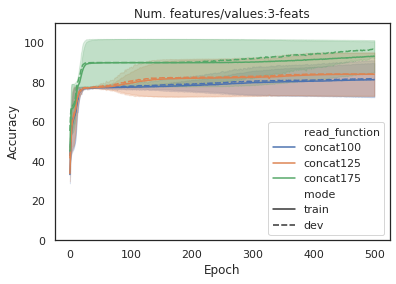

In [26]:
sns.set_style("white")
hue_order = ['concat100', 'concat125', 'concat175']
ax = sns.lineplot(x="epoch", y="question_acc", hue='read_function', hue_order=hue_order, style='mode', ci='sd', data=df)
ax.set_title('Num. features/values:' + n_feats)
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.set(ylim=(0, 110))

# plt.savefig('plots/1step.png', dpi=300)